In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import re


## Go back to the original dataset with road types

#### 1. Apply the function add_space to make the road names the same
#### 2. Classify the road_names inorder to get the different road types classified under female, male, object and/or plant.

In [6]:
ams_roads = gpd.read_file('/Users/sharaishuro/Documents/Shemaps/8%_project/ams_roads/amsterdam_roads1.shp')
ams_roads

ROAD_NAME     ROAD_TYPE        OSM_ID  \
0                  Beneluxbaan     Secondary  7.362525e+06   
1                     Floraweg  Unclassified  9.782571e+08   
2                     Asterweg      Tertiary  1.011127e+09   
3      Th. K. Van Lohuizenlaan      Tertiary  9.312338e+08   
4      Th. K. Van Lohuizenlaan      Tertiary  9.312338e+08   
...                        ...           ...           ...   
27726             Djambistraat   Residential  7.045485e+06   
27727             Borneostraat      Platform  1.947019e+08   
27728             Borneostraat    Pedestrian  1.340867e+09   
27729             Borneostraat    Pedestrian  1.340867e+09   
27730             Borneostraat    Pedestrian  1.340867e+09   

                                                geometry  
0          LINESTRING (4.8693 52.32187, 4.8693 52.32191)  
1      LINESTRING (4.91147 52.40009, 4.91142 52.40009...  
2      LINESTRING (4.90246 52.39359, 4.9025 52.39354,...  
3         LINESTRING (4.94618 52.3673, 4.94618 52.36742)  
4         LINESTRING (4.9462 52.36663, 4.94619 52.36686)  
...                                                  ...  
27726  LINESTRING (4.938 52.36612, 4.938 52.36606, 4....  
27727  LINESTRING (4.93815 52.36424, 4.93817 52.36422...  
27728  LINESTRING (4.93815 52.36424, 4.93766 52.36438...  
27729    LINESTRING (4.93711 52.36444, 4.93808 52.36416)  
27730  LINESTRING (4.93815 52.36424, 4.93862 52.3641,...  

[27731 rows x 4 columns]

In [7]:
# Define a regex pattern that ensures the street type is not already separated
STREET_TYPES_PATTERN = re.compile(r'(?<!\s)(straat|brug|singel|burg|hof|plein|gracht|laan|weg|boulevard|steeg|gouw|post|pad|park|baan|plantsoen|toren|berg|veld|dreef|dorp|dijk|kade)\b', re.IGNORECASE)

def add_space(road_name):
    if isinstance(road_name, str):
        return STREET_TYPES_PATTERN.sub(r' \1', road_name)
    return road_name

In [8]:
ams_roads['ROAD_NAME'] =ams_roads['ROAD_NAME'].apply(add_space)

In [9]:
ams_roads=ams_roads.rename(columns={'ROAD_NAME':'road_name'})

In [10]:
df = pd.read_csv('classified.csv')
df

Unnamed: 0            road_name   gender classification
0              0  'S-Gravelandse Veer     male          human
1              1       A. Moen straat     male          human
2              2       Akkerwinde weg     male          human
3              3      Akoleien straat  unknown          other
4              4     Alexander straat     male          human
...          ...                  ...      ...            ...
5464        5464          Zwarte gouw   female          human
5465        5465     Zwartehand steeg  unknown          other
5466        5466     Zwartlaken steeg  unknown          other
5467        5467     Zwenkgras straat  unknown          Plant
5468        5468              ÖRe hof   female          human

[5469 rows x 4 columns]

In [ ]:
# Merge the gender csv with the roads
updated_ams= ams_roads.merge(df[['road_name','gender','classification']], how= 'inner',on='road_name')
updated_ams

road_name     ROAD_TYPE        OSM_ID  \
0                  Benelux baan     Secondary  7.362525e+06   
1                     Flora weg  Unclassified  9.782571e+08   
2                     Aster weg      Tertiary  1.011127e+09   
3      Th. K. Van Lohuizen laan      Tertiary  9.312338e+08   
4      Th. K. Van Lohuizen laan      Tertiary  9.312338e+08   
...                         ...           ...           ...   
27726             Djambi straat   Residential  7.045485e+06   
27727             Borneo straat      Platform  1.947019e+08   
27728             Borneo straat    Pedestrian  1.340867e+09   
27729             Borneo straat    Pedestrian  1.340867e+09   
27730             Borneo straat    Pedestrian  1.340867e+09   

                                                geometry   gender  \
0          LINESTRING (4.8693 52.32187, 4.8693 52.32191)     male   
1      LINESTRING (4.91147 52.40009, 4.91142 52.40009...   female   
2      LINESTRING (4.90246 52.39359, 4.9025 52.39354,...   female   
3         LINESTRING (4.94618 52.3673, 4.94618 52.36742)     male   
4         LINESTRING (4.9462 52.36663, 4.94619 52.36686)     male   
...                                                  ...      ...   
27726  LINESTRING (4.938 52.36612, 4.938 52.36606, 4....  unknown   
27727  LINESTRING (4.93815 52.36424, 4.93817 52.36422...     male   
27728  LINESTRING (4.93815 52.36424, 4.93766 52.36438...     male   
27729    LINESTRING (4.93711 52.36444, 4.93808 52.36416)     male   
27730  LINESTRING (4.93815 52.36424, 4.93862 52.3641,...     male   

      classification  
0              human  
1              human  
2              human  
3              human  
4              human  
...              ...  
27726          other  
27727          human  
27728          human  
27729          human  
27730          human  

[27731 rows x 6 columns]

In [12]:
# Save the updated shp
updated_ams.to_file('updated_ams.shp')

/var/folders/31/rtczybp93fddw2_pd75r0pmc0000gn/T/ipykernel_53003/2475180129.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  updated_ams.to_file('updated_ams.shp')
/Users/sharaishuro/Documents/Shemaps/8%_project/shemaps/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'classification' to 'classifica'
  ogr_write(
/Users/sharaishuro/Documents/Shemaps/8%_project/shemaps/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 978257131.000000119 of field OSM_ID of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/Users/sharaishuro/Documents/Shemaps/8%_project/shemaps/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1011126698 of field OSM_ID of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/Users/sharaishuro/Documents/She

In [13]:
# Re-open it
updated_ams= gpd.read_file('updated_ams.shp')
updated_ams

road_name     ROAD_TYPE        OSM_ID   gender  \
0                  Benelux baan     Secondary  7.362525e+06     male   
1                     Flora weg  Unclassified  9.782571e+08   female   
2                     Aster weg      Tertiary  1.011127e+09   female   
3      Th. K. Van Lohuizen laan      Tertiary  9.312338e+08     male   
4      Th. K. Van Lohuizen laan      Tertiary  9.312338e+08     male   
...                         ...           ...           ...      ...   
27726             Djambi straat   Residential  7.045485e+06  unknown   
27727             Borneo straat      Platform  1.947019e+08     male   
27728             Borneo straat    Pedestrian  1.340867e+09     male   
27729             Borneo straat    Pedestrian  1.340867e+09     male   
27730             Borneo straat    Pedestrian  1.340867e+09     male   

      classifica                                           geometry  
0          human      LINESTRING (4.8693 52.32187, 4.8693 52.32191)  
1          human  LINESTRING (4.91147 52.40009, 4.91142 52.40009...  
2          human  LINESTRING (4.90246 52.39359, 4.9025 52.39354,...  
3          human     LINESTRING (4.94618 52.3673, 4.94618 52.36742)  
4          human     LINESTRING (4.9462 52.36663, 4.94619 52.36686)  
...          ...                                                ...  
27726      other  LINESTRING (4.938 52.36612, 4.938 52.36606, 4....  
27727      human  LINESTRING (4.93815 52.36424, 4.93817 52.36422...  
27728      human  LINESTRING (4.93815 52.36424, 4.93766 52.36438...  
27729      human    LINESTRING (4.93711 52.36444, 4.93808 52.36416)  
27730      human  LINESTRING (4.93815 52.36424, 4.93862 52.3641,...  

[27731 rows x 6 columns]

### Calculate length

#### To calculate the length of geometry we have to change the coordinate system to Amersfoort / RD New - Netherlands - Holland - Dutch EPSG:28992 from epsg:4326

In [14]:
updated_ams= updated_ams.to_crs(epsg=28992) 

In [15]:
updated_ams['length']= updated_ams['geometry'].length
updated_ams.head()

road_name     ROAD_TYPE        OSM_ID  gender classifica  \
0              Benelux baan     Secondary  7.362525e+06    male      human   
1                 Flora weg  Unclassified  9.782571e+08  female      human   
2                 Aster weg      Tertiary  1.011127e+09  female      human   
3  Th. K. Van Lohuizen laan      Tertiary  9.312338e+08    male      human   
4  Th. K. Van Lohuizen laan      Tertiary  9.312338e+08    male      human   

                                            geometry     length  
0  LINESTRING (119690.329 481673.206, 119690.361 ...   4.450584  
1  LINESTRING (122622.491 490356.49, 122619.088 4...  36.970572  
2  LINESTRING (122004.457 489637.34, 122007.142 4...  39.223737  
3  LINESTRING (124962.558 486693.21, 124962.639 4...  13.351844  
4  LINESTRING (124963.467 486618.656, 124962.941 ...  25.600094

## Calculate the length according to gender, plants, objects, other against the different road types

In [18]:
#Total length of roads named after women
female=updated_ams[updated_ams['gender']=='female']
pd.pivot_table(female, index='ROAD_TYPE', values='length', aggfunc={'sum','count'}).head()

count            sum
ROAD_TYPE                         
Busway          148    9670.026348
Construction     38    3990.760556
Corridor          5     344.788133
Cycleway       1282  140369.829956
Footway         813   53445.363774

In [19]:
#Total length of roads named after men
male=updated_ams[updated_ams['gender']=='male']
pd.pivot_table(male, index='ROAD_TYPE', values='length', aggfunc={'sum','count'}).head()

count            sum
ROAD_TYPE                         
Busway          412   29841.566046
Construction    109   13666.131474
Corridor          3     357.402031
Cycleway       1686  182891.410763
Footway         993   65004.301784

In [21]:
#Total length of roads named after plants
plants=updated_ams[updated_ams['classifica']=='Plant']
pd.pivot_table(plants, index='ROAD_TYPE', values='length', aggfunc={'sum','count'}).head()

count          sum
ROAD_TYPE                        
Cycleway           7   795.277565
Footway           49  2985.239899
Living street      7   184.988659
Path               2   186.185253
Pedestrian        10   806.056900

In [ ]:
#Total length of roads named after other
other=updated_ams[updated_ams['classifica']=='other']
pd.pivot_table(other, index='ROAD_TYPE', values='length', aggfunc={'sum','count'}).head()

count           sum
ROAD_TYPE                         
Busway           141   8039.335701
Construction       3    273.719385
Cycleway         365  31358.126043
Footway          572  33958.621912
Living street    138  11010.204108

In [24]:
#Total length of roads named after place
places=updated_ams[updated_ams['classifica']=='Place']
pd.pivot_table(places, index='ROAD_TYPE', values='length', aggfunc={'sum','count'}).head()

count          sum
ROAD_TYPE                        
Construction       1   166.668115
Cycleway           3    73.942102
Footway           15  2019.354513
Living street      1   109.072879
Residential       74  5910.161643

In [25]:
#Total length of roads named after objects
objects=updated_ams[updated_ams['classifica']=='Object']
pd.pivot_table(objects, index='ROAD_TYPE', values='length', aggfunc={'sum','count'}).head()

count          sum
ROAD_TYPE                        
Busway            29  2429.819989
Construction       1    12.248811
Cycleway          71  4649.459827
Footway           56  3675.325666
Living street      3   222.503056

### Calculate the percentage of streets names after plants, objects, plants, other and gender

In [34]:
# Calculate the percentage of roads according to gender
total_female_rd= (updated_ams['gender']=='female').sum()
total_male_rd = (updated_ams['gender']== 'male').sum()
total_plant_rd = (updated_ams['classifica']=='Plant').sum()
total_place_rd = (updated_ams['classifica']=='Place').sum()
total_object_rd = (updated_ams['classifica']=='Object').sum()
total_other_rd = (updated_ams['classifica']=='other').sum()
total_roads = 27731 


In [35]:
# Percentage of roads names after females
percent_women= (total_female_rd/total_roads)*100
percent_women

np.float64(24.157080523601746)

In [36]:
# Percentage of roads names after males
percent_males= (total_male_rd/total_roads)*100
percent_males

np.float64(53.36266272402727)

In [37]:
# Percentage of roads names after plants
percent_plant= (total_plant_rd/total_roads)*100
percent_plant

np.float64(0.8185784861707115)

In [38]:
# Percentage of roads names after places
percent_place= (total_place_rd/total_roads)*100
percent_place

np.float64(0.37863762576178284)

In [39]:
# Percentage of roads names after objects
percent_object= (total_object_rd/total_roads)*100
percent_object

np.float64(2.322310771338935)

In [40]:
# Percentage of roads names after other
percent_other= (total_other_rd/total_roads)*100
percent_other

np.float64(18.960729869099563)

## Show the road types on a map

In [44]:
gdf= gpd.read_file('/Users/sharaishuro/Documents/Shemaps/8%_project/gender_data/classified.shp')
gdf

osm_id            road_name   gender classifica  \
0       7371300.0  'S-Gravelandse Veer     male      human   
1     243520855.0       A. Moen straat     male      human   
2       7375671.0       Akkerwinde weg     male      human   
3     312679216.0      Akoleien straat  unknown      other   
4       7046531.0     Alexander straat     male      human   
...           ...                  ...      ...        ...   
5441    5039068.0          Zwarte gouw   female      human   
5442   54732328.0     Zwartehand steeg  unknown      other   
5443  124933460.0     Zwartlaken steeg  unknown      other   
5444  620159214.0     Zwenkgras straat  unknown      Plant   
5445    7385669.0              ÖRe hof   female      human   

                                               geometry  
0     LINESTRING (4.8971 52.36776, 4.89697 52.36774,...  
1     LINESTRING (4.93199 52.40749, 4.93309 52.40695...  
2     MULTILINESTRING ((4.91259 52.39835, 4.91252 52...  
3     LINESTRING (4.87804 52.3734, 4.87841 52.37285,...  
4     LINESTRING (4.9202 52.36419, 4.92022 52.36417,...  
...                                                 ...  
5441  MULTILINESTRING ((4.96713 52.3967, 4.96704 52....  
5442  MULTILINESTRING ((4.89162 52.37445, 4.89166 52...  
5443     LINESTRING (4.8974 52.37334, 4.89691 52.37348)  
5444  LINESTRING (5.00088 52.34707, 5.00075 52.34694...  
5445  MULTILINESTRING ((4.79054 52.34876, 4.78979 52...  

[5446 rows x 5 columns]

Text(0.5, 1.0, 'Map of Roads named after women')

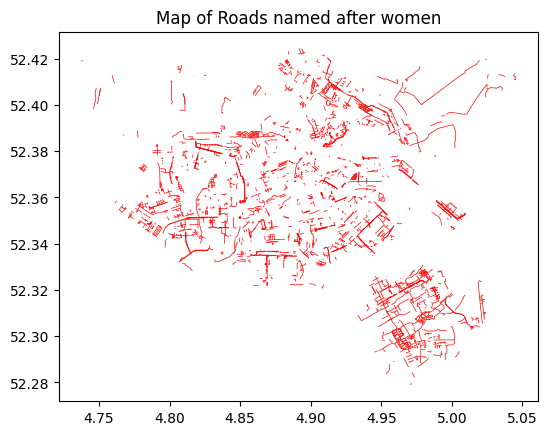

In [45]:
# Plot the roads according to gender
fem_road= gdf[gdf['gender']== 'female']
fem_road.plot( color='red',linewidth=0.5, label='Roads',)
plt.title("Map of Roads named after women") # Add a title 

Text(0.5, 1.0, 'Map of Roads named after men')

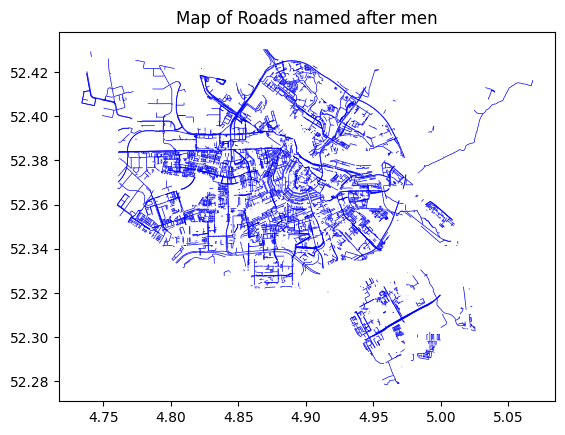

In [46]:
# Plot the roads according to gender
male_road= gdf[gdf['gender']== 'male']
male_road.plot( color='blue',linewidth=0.5, label='Roads',)
plt.title("Map of Roads named after men")

Text(0.5, 1.0, 'Map of Roads named after plants')

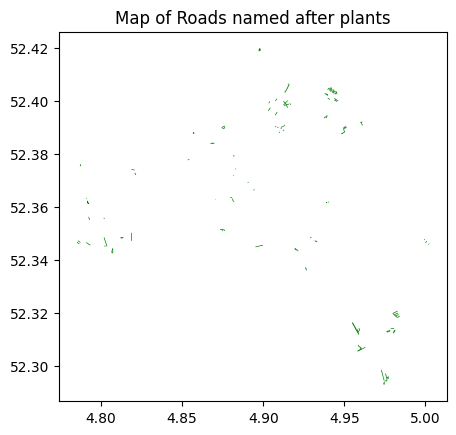

In [47]:
# Plot the roads according to gender
plants_road= gdf[gdf['classifica']== 'Plant']
plants_road.plot( color='green',linewidth=0.5, label='Roads',)
plt.title("Map of Roads named after plants")

Text(0.5, 1.0, 'Map of Roads named after plants')

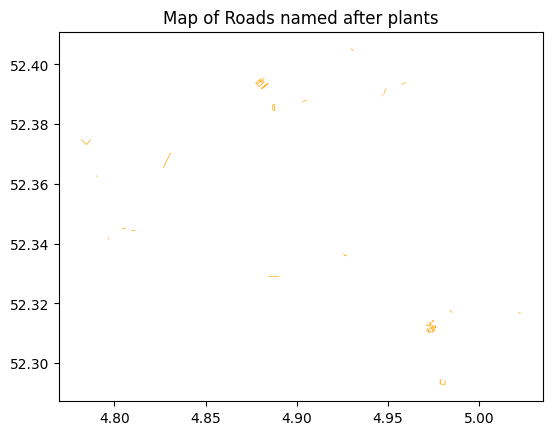

In [48]:
# Plot the roads according to gender
places_road= gdf[gdf['classifica']== 'Place']
places_road.plot( color='orange',linewidth=0.5, label='Roads',)
plt.title("Map of Roads named after plants")

Text(0.5, 1.0, 'Map of Roads named after plants')

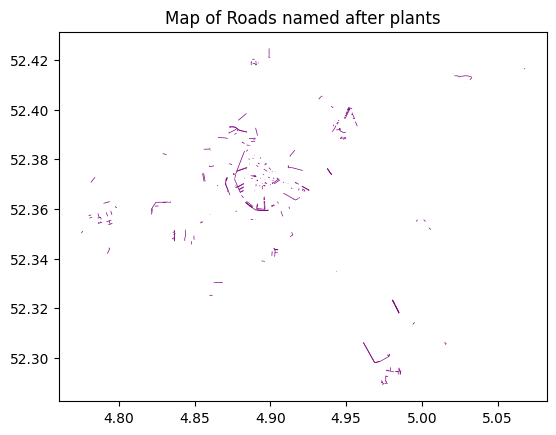

In [50]:
# Plot the roads according to gender
objects_road= gdf[gdf['classifica']== 'Object']
objects_road.plot( color='purple',linewidth=0.5, label='Roads',)
plt.title("Map of Roads named after plants")

Text(0.5, 1.0, 'Map of Roads named after plants')

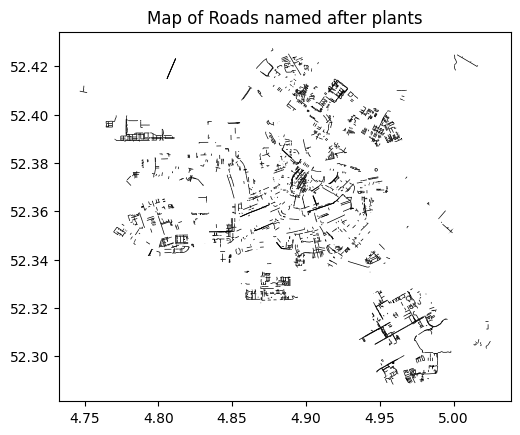

In [51]:
# Plot the roads according to gender
other_road= gdf[gdf['classifica']== 'other']
other_road.plot( color='black',linewidth=0.5, label='Roads',)
plt.title("Map of Roads named after plants")

## Overlay the male, female and other on a map

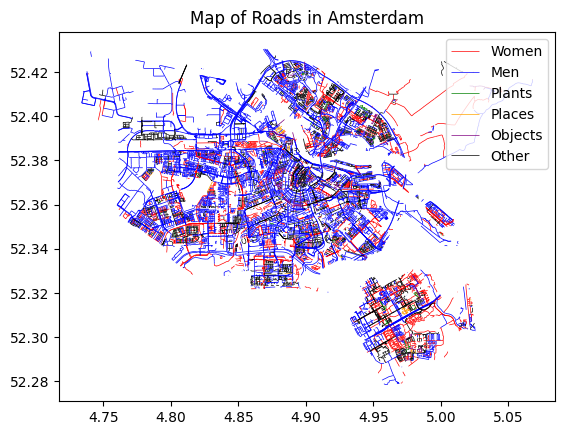

In [54]:
fig, ax = plt.subplots()  # Create figure and axes object
ax.set_aspect('equal')
fem_road.plot(ax=ax, color='red',linewidth=0.5, label='Women',)
male_road.plot(ax=ax, color='blue' , linewidth=0.5,label='Men') 
plants_road.plot(ax=ax, color='green', linewidth= 0.5, label='Plants')
places_road.plot(ax=ax, color='orange', linewidth= 0.5, label='Places')
objects_road.plot(ax=ax, color='purple', linewidth= 0.5, label='Objects')
other_road.plot(ax=ax, color='black', linewidth= 0.5, label='Other')

ax.legend()
plt.title("Map of Roads in Amsterdam") 
plt.show()